# Cycling Simulation - 1 

Welcome!

A simulation is an experiment done in computer, it could solve complex problems if it is set up correctly, and we could do repeatable controlled experiments in the virtual world. 

The following notebook will walk you through the steps to build up a simulation to estimate the time it takes to finish a Tour de France time trial stage! It will also show you the effects from using a lighter bike or a harder effort from the rider. 

This jupyter notebook is written in Python, it is a programming language that is widly used to do simulation.  

In theory, you could do these experiments in real life, but they will takes ages and may not be repeatable. Also, there will be some variables that cannot be changed easily, for example, weight of the bike, so it is much easier to do this in the virtual world. 



## How to use the notebook?
If you press ctrl - Enter on the following cell, there will be a string printed out from python. It is also how you could execute the Python commands in a cell. Alternatively, you could also click on the tap 'Cell' at the top then 'Run All'.

Let's get started with cycling simulation


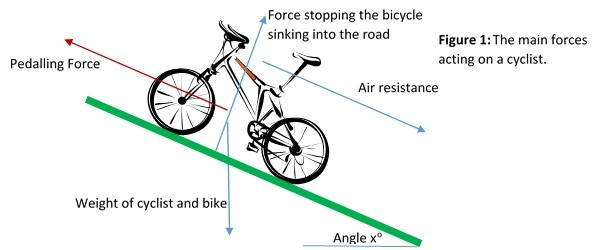

In [1]:
print("Let's get started with cycling simulation")

from IPython.display import Image
Image("https://www.harriswestminstersixthform.org.uk/uploads/asset_image/2_259_l.jpg")

## Import Libraries
Firstly, we need to import all the Python libraries we will need later on. We will need some of the python classes already written to compute the result for us. Import the following libraries.

In [2]:
import matplotlib.pylab as plt
import numpy as np
from cycling.model.core.bike import Bike
from cycling.model.core.environment import Environment
from cycling.model.core.rider import Rider
from cycling.model.core.stage import Stage
from cycling.model.core.simulation import Simulation

## Set the parameters

When you do an experiment in the laboratory, ideally you only change one variables at a time. This is a good practice and you should do the same in simulation as well. 

We will first need a baseline for our experiment, we could define the variables we want to change in the cell below. 

In [3]:
# Set rider and bike parameters 
rider_mass = 50 # [kg]
rider_name = 'Sam'
bike_mass = 6 # [kg]
bike_name = 'slim_bike'
bike_rolling_resistance = 0.05

# Initialise classes
rider = Rider(name=rider_name, mass=rider_mass, cda=0)
bike = Bike(name=bike_name, mass=bike_mass, cda=0.3, cda_climb=0.3, crr=bike_rolling_resistance)
stage = Stage(name='Tour de France-2020 Stage 20', file_name='Tour-de-France-2020---Stage-20-ITT.csv')
env = Environment()
simulation = Simulation(rider=rider, bike_1=bike, stage=stage, environment=env)

## Let's see how fast you could go!

Time to start the simulation, if you run the cell below, it will define the initial conditions of the experiment, then it will calculate the time and velocity profile of the bike. 

Behind the scenes, the computer model solves acceleration by balancing all the forces on the bike, as described at the diagram at the very top of this notebook. It may takes the computer a few seconds to finish the calculation, just be patient and wait, it is worth waiting for it as it will take a lot longer if we do those calculations by hand! 

In [4]:
# Set initial conditions
v0 = 0.1 # [m/s]
t0 = 0 # [s]

# Define stage and power
s = stage.distance

# 150W constant power
power = 150 * np.ones(len(s)) 

velocity, time, _, _ = simulation.solve_velocity_and_time(s=s, power=power, v0=v0, t0=t0)
print('Time = {:.1f} s'.format(time[-1]))
print('Average velocity = {:.1f} m/s'.format(stage.distance[-1]/time[-1]))

Time = 6235.7 s
Average velocity = 5.8 m/s


## Visualisation

Sometimes it is difficult to understand what the numbers mean, let's see if graphs help. 

Use the library matplotlib to visualise stage gradient, elevation and velocity.

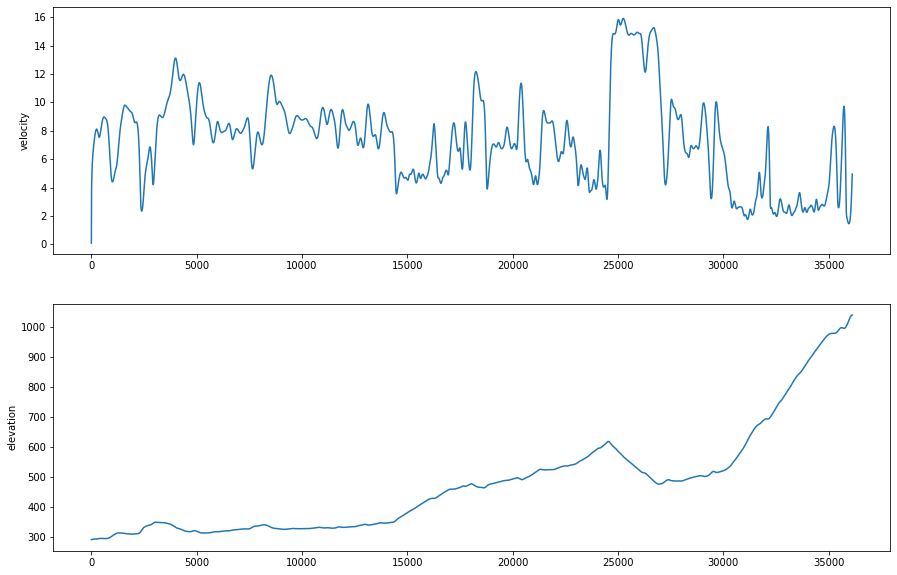

In [5]:
plt.figure(figsize=(15,10))
plt.subplot(2, 1, 1)
plt.plot(s, velocity)
plt.ylabel('velocity')
plt.subplot(2, 1, 2)
plt.plot(s, stage.elevation)
plt.ylabel('elevation')
plt.show()

You can see at the beginning of the stage, it is mostly flat. Most of the work from the rider has gone into overcoming the aerodynamics drag, therefore the rider can maintain a higher velocity for the first half of the stage. 

From 25,000 m onwards, there is a downhill section. The rider reaches up the top speed at around 15m/s at the point. 

From 27,000 m onwards, elevation keeps on increasing. A lot of work has gone into overcoming the weight of rider and the bike, therefore the velocity is significantly lower than the first half of the stage. 

## What if the bike is a little bit lighter?

You may ask - what effects would the weight of the rider have on time and velocity? 

If you look at the elevation graph above, you may spot that there is a significant increase of elevation in this stage, in fact it starts off at 290m above sea level and finishes at 1040m. 

If the bike is a little bit lighter, will the result be any different? If so, by how much? 

Let's do an experiment. Remember to just change one variable at a time, if we change more than one variable we would not be able to reach a valid conclusion.  

Decrease the bike weight by 10%, from 6kg to 5.4kg. Do you think the time required to finish the stage will be 10% lower? 

In [6]:
# Decrease the rider weight by 5kg
bike_mass = 5.4 # [kg]

# Update rider class since rider weight is updated 
bike = Bike(name=bike_name, mass=bike_mass, cda=0.3, cda_climb=0.3, crr=bike_rolling_resistance)

# Update Simulation class since rider class is updated
simulation = Simulation(rider=rider, bike_1=bike, stage=stage, environment=env)

In [7]:
# Re run the simulation 

velocity_reduce_weight, time_reduce_weight, _, _ = simulation.solve_velocity_and_time(s=s, power=power, v0=v0, t0=t0)
print('Time = {:.1f} s'.format(time_reduce_weight[-1]))
print('It is {:.1f} % quicker than the last run'.format(100 * (time[-1] - time_reduce_weight[-1])/time[-1]))
print('Average velocity = {:.1f} m/s'.format(stage.distance[-1]/time_reduce_weight[-1]))

Time = 6202.1 s
It is 0.5 % quicker than the last run
Average velocity = 5.8 m/s


## What if you are little bit more powerful?

Let's do another simulation to look at the effect power has on time and velocity. Instead of riding at 150W, increase the power by 10% to 165W and see what the effect is. 

In [8]:
# Increase power by 10% to 165W
power = 165 * np.ones(len(s)) 

In [9]:
# Re run the simulation 

velocity_high_power, time_high_power, _, _ = simulation.solve_velocity_and_time(s=s, power=power, v0=v0, t0=t0)
print('Time = {:.1f} s'.format(time_high_power[-1]))
print('It is {:.1f} % quicker than the last run'.format(100 * (time[-1] - time_high_power[-1])/time[-1]))
print('Average velocity = {:.1f} m/s'.format(stage.distance[-1]/time_high_power[-1]))

Time = 5820.8 s
It is 6.7 % quicker than the last run
Average velocity = 6.2 m/s


This is interesting! 

Decreasing the weight of the bike should make you rider faster but the computer model tell us it is only 0.5% quicker if we make the bike 10% lighter. 

On the other hand, if the rider rides 10% harder by maintaining a higher constant power, it will be 6.7% quicker, compared to the baseline. 